# Libraries

In [1]:
import os

import pandas as pd
import numpy as np
from keras import backend as K

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense , Input,Lambda
from tensorflow.keras.layers import Conv2D, TimeDistributed, MaxPooling2D, Flatten, Dense,GlobalAveragePooling1D,GlobalAveragePooling2D
from tensorflow.keras.layers import Reshape
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau , EarlyStopping
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import LSTM, Lambda, Dense, Permute, Multiply, RepeatVector, Activation, add, Conv2D, GlobalAveragePooling2D,Dropout

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preparation

In [2]:
fullpath = '/kaggle/input/ucf-crime-full'
p1= os.listdir(fullpath)
p1

['RoadAccidents',
 'Assault',
 'Vandalism',
 'Arrest',
 'Shooting',
 'Arson',
 'Explosion',
 'Shoplifting',
 'Robbery',
 'Stealing',
 'Burglary',
 'Abuse',
 'Fighting',
 'Normal_Videos_for_Event_Recognition']

- exclude some classes:  [  Shoplifting , Vandalism ,   Arrest ,Arson ,Robbery ] 

In [3]:
p1.remove( "Shoplifting" )
p1.remove( "Vandalism")
p1.remove( "Arrest")
p1.remove( "Arson")
p1.remove( "Robbery")


In [4]:
p1

['RoadAccidents',
 'Assault',
 'Shooting',
 'Explosion',
 'Stealing',
 'Burglary',
 'Abuse',
 'Fighting',
 'Normal_Videos_for_Event_Recognition']

In [5]:
import os
import glob

folder_list = ['RoadAccidents',
 'Assault',
 'Shooting',
 'Explosion',
 'Stealing',
 'Burglary',
 'Abuse',
 'Fighting',
 'Normal_Videos_for_Event_Recognition']
video_extensions = ['mp4']
data = []

for folder in folder_list:
    folder_path = os.path.join(fullpath, folder)
    video_files = [f for f in glob.glob(os.path.join(folder_path, '*')) if f.split('.')[-1] in video_extensions]

    for video_file in video_files:
        label = folder
        file_path = os.path.abspath(video_file)
        data.append({'file_path': file_path, 'label': label})
data =pd.DataFrame(data)

data
    

,file_path,label
0,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,RoadAccidents
1,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,RoadAccidents
2,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,RoadAccidents
3,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,RoadAccidents
4,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,RoadAccidents
...,...,...
645,/kaggle/input/ucf-crime-full/Normal_Videos_for...,Normal_Videos_for_Event_Recognition
646,/kaggle/input/ucf-crime-full/Normal_Videos_for...,Normal_Videos_for_Event_Recognition
647,/kaggle/input/ucf-crime-full/Normal_Videos_for...,Normal_Videos_for_Event_Recognition
648,/kaggle/input/ucf-crime-full/Normal_Videos_for...,Normal_Videos_for_Event_Recognition


In [6]:
data['label'].value_counts()

RoadAccidents                          150
Stealing                               100
Burglary                               100
Assault                                 50
Shooting                                50
Explosion                               50
Abuse                                   50
Fighting                                50
Normal_Videos_for_Event_Recognition     50
Name: label, dtype: int64

In [7]:
data['label'].value_counts()

RoadAccidents                          150
Stealing                               100
Burglary                               100
Assault                                 50
Shooting                                50
Explosion                               50
Abuse                                   50
Fighting                                50
Normal_Videos_for_Event_Recognition     50
Name: label, dtype: int64

In [11]:
data['label'].value_counts()


RoadAccidents                          150
Stealing                               100
Burglary                               100
Assault                                 50
Shooting                                50
Explosion                               50
Abuse                                   50
Fighting                                50
Normal_Videos_for_Event_Recognition     50
Name: label, dtype: int64

In [8]:
df_shuffled = data.sample(frac=1.0, random_state=42)
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled

,file_path,label
0,/kaggle/input/ucf-crime-full/Normal_Videos_for...,Normal_Videos_for_Event_Recognition
1,/kaggle/input/ucf-crime-full/Shooting/Shooting...,Shooting
2,/kaggle/input/ucf-crime-full/Burglary/Burglary...,Burglary
3,/kaggle/input/ucf-crime-full/Stealing/Stealing...,Stealing
4,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,RoadAccidents
...,...,...
645,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,RoadAccidents
646,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,RoadAccidents
647,/kaggle/input/ucf-crime-full/Explosion/Explosi...,Explosion
648,/kaggle/input/ucf-crime-full/Burglary/Burglary...,Burglary


In [9]:
df_shuffled['label'].value_counts()

RoadAccidents                          150
Burglary                               100
Stealing                               100
Normal_Videos_for_Event_Recognition     50
Shooting                                50
Abuse                                   50
Assault                                 50
Explosion                               50
Fighting                                50
Name: label, dtype: int64

In [10]:
df_shuffled.to_csv('data.csv')

In [11]:
label_map = {'Normal_Videos_for_Event_Recognition': 0, 'Abuse': 1, 'Assault': 2, 'Explosion': 3, 'Fighting': 4,'Shooting':5,'Stealing':6,'Burglary':7,'RoadAccidents':8}
df_shuffled['label'] = df_shuffled['label'].map(label_map)



In [12]:
df_shuffled

,file_path,label
0,/kaggle/input/ucf-crime-full/Normal_Videos_for...,0
1,/kaggle/input/ucf-crime-full/Shooting/Shooting...,5
2,/kaggle/input/ucf-crime-full/Burglary/Burglary...,7
3,/kaggle/input/ucf-crime-full/Stealing/Stealing...,6
4,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,8
...,...,...
645,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,8
646,/kaggle/input/ucf-crime-full/RoadAccidents/Roa...,8
647,/kaggle/input/ucf-crime-full/Explosion/Explosi...,3
648,/kaggle/input/ucf-crime-full/Burglary/Burglary...,7


In [13]:
# split data to train and val
from sklearn.model_selection import train_test_split

# Split the dataframe into training and testing sets
train_df, val_df = train_test_split(df_shuffled, test_size=0.3, random_state=42)


In [14]:
len(train_df)

455

In [15]:
len(val_df)

195

In [16]:
# Split the data into training, validation, and test sets
X_train , y_train, X_val, y_val = train_df['file_path'].tolist() , train_df['label'].tolist(),val_df['file_path'].tolist() , val_df['label'].tolist()

# Custom Generator

In [17]:
%%writefile mod_gen334.py
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

class VideoDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, video_paths, labels, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=5, shuffle=True, num_frames=30):
        self.video_paths = video_paths
        self.labels = labels
        self.batch_size = batch_size
        self.frame_size = frame_size
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.num_frames = num_frames
        self.indexes = np.arange(len(self.video_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.video_paths) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        video_paths_batch = [self.video_paths[k] for k in indexes]
        labels_batch = [self.labels[k] for k in indexes]
        X, y = self.__data_generation(video_paths_batch, labels_batch)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, video_paths_batch, labels_batch):
        X = np.zeros((self.batch_size, self.num_frames, *self.frame_size, self.num_channels))
        y = np.zeros((self.batch_size, self.num_frames,self.num_classes))
        #print('labels_batch:', labels_batch)
        #print('num_classes:', self.num_classes)
        for i, video_path in enumerate(video_paths_batch):
            frames = self.get_frames(video_path)
      
            clip = np.concatenate(frames, axis=-1)  # concatenate RGB channels
          
            clip_shape = clip.shape
            clip = clip.transpose((1, 2, 3, 0))
            X[i,:,:,:,:] = clip
            #print(X)
            y[i,] = to_categorical(labels_batch[i], num_classes=self.num_classes)
        return X, y

    def get_frames(self, video_path):
        import cv2
        mean = [0.22146088 , 0.20873131  ,0.2019145 ]
        std =  [0.52410259  ,0.52200656  ,0.52084839]
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            cap.open(video_path)
        # Get the total number of frames
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        # Calculate the time interval between frames for the second and third parts of the video
        time_interval = total_frames /self.num_frames
        clips=[]
        # Sample frames at a fixed time interval for the second and third clips
        frames = []
        for i in range(self.num_frames):
            # Calculate the frame index based on the time interval for the second and third clips
            frame_index = int(i * time_interval )
            # Seek to the frame index using cv2.CAP_PROP_POS_FRAMES
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
            ret = True
            if (True and ret):
                # Read and decode the frame
                ret, frame = cap.read()
                # Append the frame to the list of frames
                if ret==False:
                    break
                frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                frame = (frame - mean) / std
                frames.append(frame)
        avg_resized_frames = []
        r_frames = []
        g_frames = []
        b_frames = []
        for af in frames:
            rsz_f = cv2.resize(af,(self.frame_size[0], self.frame_size[1]))
            r_frames.append(rsz_f[:,:,0])
            g_frames.append(rsz_f[:,:,1])
            b_frames.append(rsz_f[:,:,2])
        avg_resized_frames.append(r_frames)
        avg_resized_frames.append(g_frames)
        avg_resized_frames.append(b_frames)
        clip=np.asarray(avg_resized_frames)
        clips.append(clip)
        return clips

Writing mod_gen334.py


In [18]:
from mod_gen334 import VideoDataGenerator


In [19]:
# def __init__(self, video_paths, labels, batch_size, frame_size=(224, 224), num_channels=3, num_classes=2, shuffle=True, num_frames=16):

train_generator = VideoDataGenerator(X_train, y_train, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=9, shuffle=False, num_frames=30)
val_generator = VideoDataGenerator(X_val, y_val, batch_size=32, frame_size=(224, 224), num_channels=3, num_classes=9, shuffle=False, num_frames=30)

In [20]:
X_batch, y_batch = train_generator[0]


In [21]:
X_batch.shape

(32, 30, 224, 224, 3)

In [23]:
y_batch.shape

(32, 30, 9)

In [24]:
y_batch[5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0.

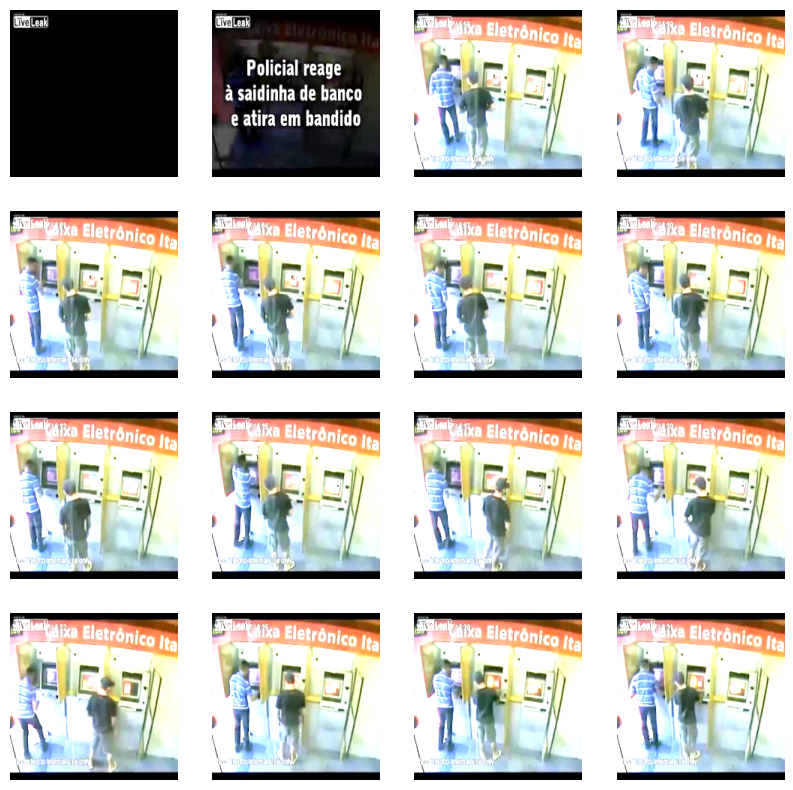

In [25]:
import matplotlib.pyplot as plt

# print the all 16 frames for first video
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

t = X_batch[0]
for i, ax in enumerate(axes.flat):
    frame_tensor = t[i, :, :, :] / 255 
    ax.imshow(frame_tensor)  
    ax.set_axis_off()

plt.show()

# Build Model 

In [26]:
def attention_block(inputs):
    """
    Compute attention scores and apply them to the input tensor.
    """
    input_dim = int(inputs.shape[2])
    a = Permute((2, 1))(inputs)  # convert (batch_size, timesteps, input_dim) to (batch_size, input_dim, timesteps)
    a = Dense(inputs.shape[1], activation='softmax')(a)  # compute attention scores
    a = Permute((2, 1))(a)  # convert (batch_size, input_dim, timesteps) back to (batch_size, timesteps, input_dim)
    a = Multiply()([inputs, a])  # apply attention scores to input tensor
    return a

In [38]:
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Reshape, Lambda, Conv2D
from tensorflow.keras.layers import DepthwiseConv2D, BatchNormalization, Add, Activation, GlobalAveragePooling2D,TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

def build_model(num_frames=30,num_layer=4,num_units=64,num_classes=9, recurrent_dropout=0.5, dropout=0.5):
    # Create input layer for sequence of frames
    frames_input = Input(shape=(num_frames, 224, 224, 3))

    # Create MobileNetV2 model without the final classification layers
    mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

   # set all layers in the pre-trained MobileNetV2 model to non-trainable
    for layer in mobilenet_model.layers:
        layer.trainable = False

    # get the output from the pre-trained MobileNetV2 model for each frame
    frames_output = []
    for i in range(32):
        frame = frames_input[i, :, :, :, :]
        #print(frame.shape)
        frame_output = mobilenet_model(frame)
        frames_output.append(frame_output)
    #print(len(frames_output))
    #print(frames_output)
    # concatenate the output from each frame
    aggregated_output = tf.concat(frames_output, axis=0)
   # print(aggregated_output.shape)

    feature_size = mobilenet_model.output_shape[-1]
    aggregated_output = tf.reshape(aggregated_output, (32,30, 1280))
    # reshape the output to have a shape of (32, num_frames, 1280)  # reshape 32 , 30 , 1280 
    #aggregated_output = tf.reshape(aggregated_output, (32,30, -1))
    #aggregated_output = Reshape((1, 1, 1280))(aggregated_output)    
    #print(aggregated_output.shape)

    # apply a convolutional layer to the aggregated output
    #aggregated_output = Conv2D(filters=1280, kernel_size=1, activation='relu')(aggregated_output)
    # reshape the output using a Lambda layer
   # aggregated_output = Lambda(lambda x: K.reshape(x, (-1, num_frames, 1280)))(aggregated_output)

    # apply a fully connected layer with 1000 units
    aggregated_output = Dense(units=1000, activation='relu')(aggregated_output)
    #print(aggregated_output.shape)
    x = aggregated_output
    # Apply batch normalization to the inputs of the residual LSTM
    #x = BatchNormalization()(x)
    x_rnn = LSTM(128,   return_sequences=False)(x)
    #x = Add()([x, x_rnn])
    x = attention_block(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x_rnn = LSTM(128,  return_sequences=False)(x)
    #x = Add()([x, x_rnn])
    x = attention_block(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    x_rnn = LSTM(64, return_sequences=False)(x)
    #x = Add()([x, x_rnn])
    x = attention_block(x)
    x = BatchNormalization()(x)
    
    x_rnn = LSTM(64, return_sequences=True)(x)
    output = TimeDistributed(Dense(num_classes, activation='softmax'))(x)
    #output = Dense(num_classes, activation='softmax')(x_rnn)

    # Build the model
    model = Model(inputs=frames_input, outputs=output)

    return model

# Training

In [41]:
model = build_model()

In [42]:
 model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 30, 224, 22  0           []                               
                                4, 3)]                                                            
                                                                                                  
 tf.__operators__.getitem_96 (S  (30, 224, 224, 3)   0           ['input_7[0][0]']                
 licingOpLambda)                                                                                  
                                                                                                  
 tf.__operators__.getitem_97 (S  (30, 224, 224, 3)   0           ['input_7[0][0]']                
 licingOpLambda)                                                                            

In [43]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss='categorical_crossentropy', metrics=['accuracy'])



In [44]:
# define callbacks lists
model_checkpoint_callback = ModelCheckpoint(
  filepath='best_weights.h5',
  monitor='loss', 
  verbose=0, 
  save_best_only=True, 
  mode='min')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                          patience=3, 
                                          verbose=1, 
                                          factor=0.5, 
                                          min_lr=0.00001)
es = EarlyStopping(monitor="loss", mode="min", verbose=1, patience=7)
callbacks_list = [model_checkpoint_callback, learning_rate_reduction,es]


In [45]:
#  first generator here with this model....
history = model.fit_generator(generator=train_generator,epochs= 50,validation_data=val_generator,callbacks=callbacks_list,verbose=1)

Epoch 1/50
15/15 [==============================] - 1287s 83s/step - loss: 2.2302 - accuracy: 0.1112 - val_loss: 1.9041 - val_accuracy: 0.2188 - lr: 0.0100
Epoch 2/50


KeyboardInterrupt: 

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
fig.suptitle("Loss and Accuracy")
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)